In [1]:
import os

#Manejo de matrices y tablas
import numpy as np
import pandas as pd

#Estadistica y funciones matemáticas
import scipy.stats as st
from scipy.optimize import fmin
from scipy import integrate
from scipy.stats.mstats import mquantiles
import statistics 

#Probabilistic programs
import pymc3 as pm
import theano.tensor as tt #NOTA: theano va a cambiar a tensorflow en PyMC4
from theano.compile.ops import as_op
print('Running on PyMC3 v{}'.format(pm.__version__))

#Graficas
import seaborn as sns
import plotly.graph_objects as go
import altair as alt
from altair_saver import save #ademas instalar en terminal: brew cask install chromedriver
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.gridspec import GridSpec
from matplotlib import animation, rc
from IPython.display import display, HTML, Markdown
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, HBox, VBox, Layout
from graphviz import Source, Digraph
import dot2tex as d2t
from latex import build_pdf
from mpl_toolkits.mplot3d import axes3d
import arviz as az

#Funciones propias (tienen que estar en el mismo directorio)
import my_fun as mf

Running on PyMC3 v3.9.3


# Decisiones de riesgo

Santiago Alonso-Díaz, PhD <br>
Universidad Javeriana

Empecemos con un ejercicio.

Hombre de 95 años con tumor  
- 0.9 de probabilidad es maligno 
- Si no es maligno, tiene 34.8 meses de vida
- Si es maligno:
    - Con radioterapia,  16.7 meses de vida
    - Con cirugia, 0.35 prob. de morir, 0.65 de vivir 20.3 meses
    - Sin tratamiento, 5.6 meses de vida
    - Radioterapia o cirugia reduce tiempo de vida en 1 mes adicional

Muestre que la radioterapia es el tratamiento preferido (valor esperado: 17.5 meses de vida)


Un marco general en teoría de la decisión es la idea de utilidad esperada

$$ U(x) = p(x) v(x)$$

Pregunta: ¿Es probabilidad lo mismo que riesgo? No, es un elemento.

Pregunta 2: ¿Es riesgo lo mismo que incertidumbre? No

Ha aumentado el uso de la palabra riesgo (Li & Hertwig, 2020)
<center><img src="img/6_CB/Li1.svg" width = "400" height = '400'></center>


Principales asociaciones con riesgo (Li & Hertwig, 2020)
<center><img src="img/6_CB/Li2.svg" width = "400" height = '400'></center>

Preferencias de riesgo se relacionan en varios dominios (Dohmen, et al, 2011)
<center><img src="img/6_CB/Dohmen1.png" width = "500" height = '500'></center>

<div align="center" style = "font-size: 70px"> ¿Qué es riesgo? </div>

In [ ]:
# En riesgo CONOCEMOS la distribución de probabilidad del evento.
# Riesgo puede obtenerse de las distribuciones de prob. (e.g. varianza)
wD = widgets.Dropdown(options=[('Normal', 0), 
                               ('Uniform', 1), 
                               ('Log-Normal', 2)],
                        value=0, description='Distr.: ')
out = widgets.interactive_output(mf.dropdown_callback,{'distr': wD})
VBox([wD, out])

<div align="center" style = "font-size: 70px"> ¿Actitudes al riesgo en economía? </div>

In [ ]:
# Actitudes al riesgo como concavidad de la función de utilidad
# Alto valor baja probabilidad alto riesgo
wD = widgets.FloatSlider(min = 0, max = 2, step = 0.01, value=1,
                        description = 'Actitud')
out = widgets.interactive_output(mf.slider_econ_risk,{'alpha': wD})
VBox([wD, out])

<div align="center" style = "font-size: 70px"> ¿Actitudes al riesgo en ciencias cognitivas y del comportamiento? </div>

Hay muchas alternativas:
* Regret and disappointment theory (Bell, 1982, 1985; Loomes & Sugden, 1982)
* Priority heuristic (Brandstätter, Gigerenzer, & Hertwig, 2006)
* Transfer-of-attention exchange model (Birnbaum, 2008; Birnbaum & Chavez, 1997)
* Decision field theory (Busemeyer & Townsend, 1993; Roe, Busemeyer, & Townsend, 2001) 
* Weighted utility theory (e.g. Fishburn, 1983)
* Proportional difference model (González-Vallejo, 2002) 
* Decision affect theory (Mellers, 2000) 
* Dual system model of preference under risk (Mukherjee, 2010) 
* Rank-dependent expected utility theories (e.g., Quiggin, 1982)
* Decisions by sampling (Stewart, Chater, & Brown, 2006)
* Prospect theory (Kahneman & Tversky, 1979)

<div align="center" style = "font-size: 70px"> ¿Cómo medirlo? </div>


Hay varias alternativas:
* Auto-reportes
    * Busqueda de sensaciones (Zuckerman, Eysenck, & Eysenck, 1978)
    * Busqueda de aventuras (Eysenck, Pearson, Easting, & Allsopp, 1985)
    * Impulsividad (Barratt, 1985; Eysenck et al., 1985)
    * Otras (Frey, et al, 2017)
* Mediciones controladas
    * The Balloon Analogue Risk Task (Lejuez, et al, 2002)
    * Loterías (Kahneman & Tversky, 1979)



# Modelos Bayesianos Descriptivos

# BART
<center><img src="img/6_CB/Lejuez1.png" width = "600" height = '600'></center>

<center><img src="img/6_CB/Lejuez2.png" width = "600" height = '600'></center>

Varios turnos. Diferentes colores del globo indican riesgo (no se le dice al sujeto). Cada inflada subía en una constante los dolares ganados y el riesgo de explotar.
<center><img src="img/6_CB/Lejuez3.png" width = "500" height = '500'></center>

### ¿Qué riesgo mide BART?

Lejuez, et al, 2002 tomaron otras medidas para correlacionarlas con BART

* Auto reportes en otros dominios (busqueda de sensaciones, impulsividad, empatía, depresión, personalidad, adicciones a drogas, adicciones a juegos, uso de preservativos, entre otros)



Pumps óptimos (centro) 
<center><img src="img/6_CB/Lejuez4.png" width = "600" height = '600'></center>

### Resultados

* Aversión al riesgo ($pumps < pumps_{optimo}$)
* Poca variablidad en naranja y amarillo

<center><img src="img/6_CB/Lejuez5.png" width = "600" height = '600'></center>

BART se correlaciona con autoreportes. Lejuez, et al, 2002 primero redujeron los autoreportes con PCA.

PCA (ejemplo hipotético con dos medidas)
<center><img src="img/6_CB/GaussianScatterPCA.svg" width = "200" height = '200'></center>

PCA (Lejuez)

<center><img src="img/6_CB/Lejuez6.png" width = "600" height = '600'></center>

BART se correlacionó con las dimensiones de riesgo obtenidas con PCA

<center><img src="img/6_CB/Lejuez7.png" width = "500" height = '500'></center>


### Discusión
* BART mide preferencias de riesgo que no se capturan con autoreportes.
* Hubo aversión al riesgo en promedio (menos pumps de lo óptimo).


### Aplicación del BART: Contrafactuales


<center><img src="img/6_CB/FitzGibbon1.png" width = "600" height = '600'></center>


Existencialismo ¿Qué tal si hubiera hecho esto?
* ¿pagar para saber que hubiera pasado aún si lleva a "dolor"? e.g. confirmar infidelidad de su pareja


Información no siempre es instrumental (i.e. no trae beneficios), pero satisface curiosidad.

<center><img src="img/6_CB/FitzGibbon2.png" width = "500" height = '520'></center>


Información no instrumental incluso activa areas del cerebro de recompensa (Fitzgibbon, et al, 2020)

<center><img src="img/6_CB/FitzGibbon3.png" width = "600" height = '600'></center>

Predicción: 
* Curiosidad contrafactual es un motivador así tenga costos como arrepentimiento.
* La curiosidad contrafactual satisfecha induce cambios de comportamientos (e.g. preferir más riesgo) 

Podemos usar BART para estudiar curiosidad contra-factual

<center><img src="img/6_CB/FitzGibbon4.png" width = "500" height = '500'></center>

<center><img src="img/6_CB/FitzGibbon5.png" width = "700" height = '700'></center>

Los 5 experimentos fueron similares exceptuando costo info. pues esa era la intervención.
<center><img src="img/6_CB/FitzGibbon6.png" width = "600" height = '600'></center>

Los turnos con información aumentaban el arrepentimiento (within-subject). Missed opportunity es el numero de pumps adicionales que aguantaba el globo.

<center><img src="img/6_CB/FitzGibbon7.png" width = "600" height = '600'></center>


### Modelación de riesgo en BART (BART chapter, Lee & Wagenmakers, 2013, textbook)

BART es una medida interesante ... ahora hagamos un modelo NOTA: el de wagenmakers + el implementarlo con la data de fitzgibbon (https://osf.io/mtsqv/)

Task description: The probability of the balloon bursting is constant, and the expected gain of every decision to pump is zero.
<center><img src="img/6_CB/LeeWag1.png" width = "600" height = '600'></center>

$\gamma^{+}: \text{risk taking}, \ \beta: \text{consistency}, \ p: \text{belief of burst prob.}, \ d_{jk}: \text{observed choice}, \ Choice_k: \text{k pumps}, \\ \omega: \text{# of pumps considered optimal}, \theta_{jk}:\text{cashing prob.}$
<center><img src="img/6_CB/model_BART.svg" width = "451" height = '450'></center>



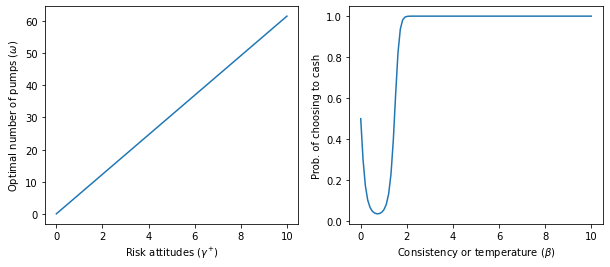

In [31]:
#Understanding/visualizing the parameters
p = 0.15 #(belief) prob. of bursting. Assumed by lee and wagenmakers
gammap = np.linspace(0,10,100)
beta = np.linspace(0,10,100)
omega = - (gammap)/(np.log(1-p))

#why omega is npumps_optimal conditional on a risk parameter gammap?
#let's rename omega to npumps_optim and do some basic algebra
#npumps_optim*np.log(1-p) = - gammap
#e^(npumps_optim*np.log(1-p)) = (e^-gammap)
#e^(np.log((prob_noburst)^npumps_optim)) = (e^-gammap)
#prob_noburst^npumps_optim = (e^-gammap)
#if participants wants a given probability of no burst, 
#and conditional on a gammap, npumps_optim is the optimal number of pumps
#Above is not tolerable, below is still tolerable. 
#The optimal fullfils the equality 

k = 9 #observed number of pumps
thetajk = 1/(1+np.exp(beta*(k-omega))) #beta is a temperature parameter

fig, ax = plt.subplots(1,2, figsize = [10,4])
ax[0].plot(gammap, omega)
ax[0].set_xlabel('Risk attitudes ($\\gamma^{+}$)')
ax[0].set_ylabel('Optimal number of pumps ($\\omega$)')

ax[1].plot(beta, thetajk)
ax[1].set_xlabel('Consistency or temperature ($\\beta$)')
ax[1].set_ylabel('Prob. of choosing to cash');


In [59]:
#The following implementation in PyMC3 was done by Junpeng Lao: 
# https://github.com/junpenglao/Bayesian-Cognitive-Modeling-in-Pymc3

#First: data setup
p = 0.15  # (Belief of) bursting probability
ntrials = 90  # Number of trials for the BART
extreme_npumps = 30 #some unlikely large number

Data = pd.read_csv("data/6_CB/GeorgeSober.txt", sep="\t") #subject named George (he can be sober, tipsy, or drunk; change the filename)
print(Data.groupby(['pres.bl']).mean())
#gr.fact: I think it is the visual growth of balloon i.e. a cue for the subject
#'prob': (real) of bursting; 
#'pumps': on that trial; 
#'cash': won on the trial; 'total': cash so far

cash = np.asarray(Data["cash"] != 0, dtype=int)
npumps = np.asarray(Data["pumps"], dtype=int)
options = cash + npumps #type of choices experienced i.e. receiving some cash and pumping n times
d = np.full([ntrials, extreme_npumps], np.nan) 
k = np.full([ntrials, extreme_npumps], np.nan) 
# response vector
for j, ipumps in enumerate(npumps): 
    inds = np.arange(options[j], dtype=int) 
    k[j, inds] = inds + 1 #+1 because arange starts at 0
    if ipumps > 0:
        d[j, 0:ipumps] = 0
    if cash[j] == 1:
        d[j, ipumps] = 1

indexmask = np.isfinite(d) #to clean nans
d = d[indexmask] #vector with cashing decisions (0:no, 1: yes); a 0 along a reset of k below means a burst 
k = k[indexmask] #vector with number of pumps at each decision point in d



         block  gr.fact  prob.  trial     pumps   cash     total
pres.bl                                                         
1          2.0   0.1765   15.0   15.5  2.333333  0.483  7.545333
2          1.0   0.1111   10.0   15.5  2.800000  0.471  6.801333
3          3.0   0.2500   20.0   15.5  2.033333  0.553  9.547000


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, gammap]


Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 2 seconds.
The acceptance probability does not match the target. It is 0.8834336326551682, but should be close to 0.8. Try to increase the number of tuning steps.


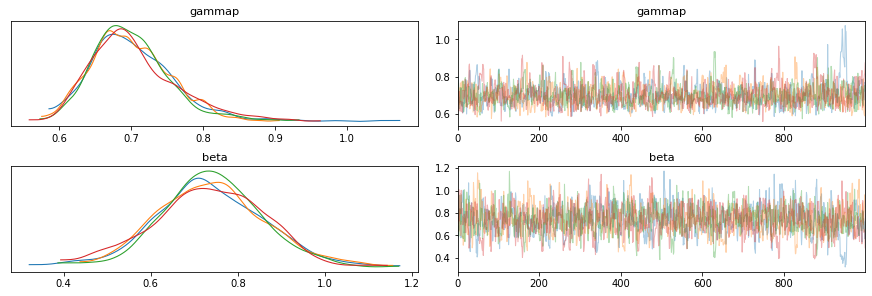

In [72]:
with pm.Model():
    gammap = pm.Uniform("gammap", lower=0, upper=10, testval=1.2)
    beta = pm.Uniform("beta", lower=0, upper=10, testval=0.5)
    omega = pm.Deterministic("omega", -gammap / np.log(1 - p))

    thetajk = 1 - pm.math.invlogit(-beta * (k - omega))

    djk = pm.Bernoulli("djk", p=thetajk, observed=d)

    trace = pm.sample(tune=2000)
    data = az.from_pymc3(trace=trace)


az.plot_trace(data, var_names=["gammap", "beta"]);

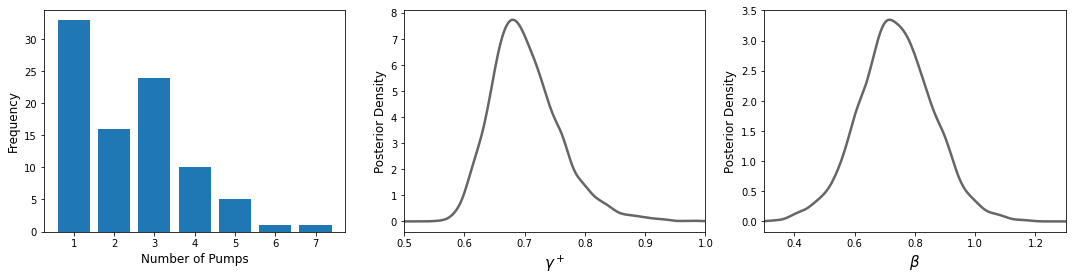

In [73]:
#This plots the fig. 16.3 of lee, wagenmakers, 2013, textbook
gammaplus = trace["gammap"]
beta = trace["beta"]

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].hist(npumps, bins=range(1, 9), rwidth=0.8, align="left")
axes[0].set_xlabel("Number of Pumps", fontsize=12)
axes[0].set_ylabel("Frequency", fontsize=12)

my_pdf1 = st.kde.gaussian_kde(gammaplus)
x1 = np.linspace(0.5, 1, 200)
axes[1].plot(x1, my_pdf1(x1), "k", lw=2.5, alpha=0.6)  # distribution function
axes[1].set_xlim((0.5, 1))
axes[1].set_xlabel(r"$\gamma^+$", fontsize=15)
axes[1].set_ylabel("Posterior Density", fontsize=12)

my_pdf2 = st.kde.gaussian_kde(beta)
x2 = np.linspace(0.3, 1.3, 200)
axes[2].plot(
    x2, my_pdf2(x2), "k", lw=2.5, alpha=0.6,
)  # distribution function
axes[2].set_xlim((0.3, 1.3))
axes[2].set_xlabel(r"$\beta$", fontsize=15)
axes[2].set_ylabel("Posterior Density", fontsize=12)

plt.tight_layout();

# Exercises

1) Apply the model to data from a different subject, Bill, provided in the file BillSober.txt. Compare the estimated parameters for George and Bill. Who has the greater propensity for risk?

2) What happens if two pumps are added to each trial for George’s data? Make this change to the npumps variable (i.e. duplicate npumps). Which of the two parameters changed the most?

3) Modify George’s data in a different way to affect the behavioral consistency parameter.

### But what does it mean? 

We have data from the same subject with different alcohol levels. We can estimate parameters for each level or do a hierarchical model. Let's do the latter.

## A hierarchical extension of the BART model
  
  
$$ \mu_{\gamma^{+}} \sim \text{Uniform}(0,10) $$
$$ \sigma_{\gamma^{+}} \sim \text{Uniform}(0,10) $$
$$ \mu_{\beta} \sim \text{Uniform}(0,10) $$
$$ \sigma_{\beta} \sim \text{Uniform}(0,10) $$
$$ \gamma^{+}_i \sim \text{Gaussian}(\mu_{\gamma^{+}}, 1/\sigma_{\gamma^{+}}^2) $$
$$ \beta_i \sim \text{Gaussian}(\mu_{\beta}, 1/\sigma_{\beta}^2) $$
$$ \omega_i = -\gamma^{+}_i \,/\,\text{log}(1-p) $$
$$ \theta_{ijk} = \frac{1} {1+e^{\beta_i(k-\omega_i)}} $$
$$ d_{ijk} \sim \text{Bernoulli}(\theta_{ijk}) $$

# Discusión en clase
¿Cómo cambiaría el modelo gráfico de abajo para hacerlo jerárquico y siga las formulas anteriores?
<center><img src="img/6_CB/model_BART.svg" width = "451" height = '450'></center>


<div align="center" style = "font-size: 70px"> Prospect Theory </div>

In [ ]:
# Subjective value function prospect theory
wAw = widgets.FloatSlider(min = 0, max = 1, step = 0.01, value=0.3,
                        description = 'Alpha win')
wAl = widgets.FloatSlider(min = 0, max = 1, step = 0.01, value=0.15,
                        description = 'Alpha lose')
wLA = widgets.FloatSlider(min = 0, max = 2, step = 0.01, value=2,
                        description = 'Loss aversion')
out = widgets.interactive_output(mf.slider_econ_beh_risk,
                                 {'alpha_win': wAw,'alpha_lose': wAl, 
                                  'loss_aversion': wLA})
left_widgets = VBox([wAw, wAl])
right_widgets = VBox([wLA])
top = HBox([left_widgets, right_widgets])
VBox([top, out])

<div align="center" style = "font-size: 70px"> Percepción de probabilidades </div>

In [ ]:
# Weighting function prospect theory
wT = widgets.FloatSlider(min = 0, max = 2, step = 0.01, value=0.5,
                        description = 'Theta')
out = widgets.interactive_output(mf.slider_econ_beh_prob, {'theta': wT})
VBox([wT, out])

Algunos fenómenos psicológicos relacionados a probabilidades y riesgo
* Optimismo (desmeritar riesgos negativos)
* Gusto por el statu quo (decidir relativo a un referente)
* Disponibilidad (prob. depende de recuerdos)
* Hindsight (lo que ocurrió es lo probable)
* Framing effects (la forma de presentar probabilidades importa)

Los efectos se replican en varias poblaciones del mundo
<center><img src="img/6_CB/Ruggeri1.svg" width = "700" height = '700'></center>

Y prospect theory puede explicar alrededor del 90% de problemas DESCRITOS (por experiencia es complicado)
<center><img src="img/6_CB/Ruggeri2.svg" width = "700" height = '700'></center>

Medición de framing effects 
#### Situacion 1:
Imagine que le damos 1000 dólares. Ya son suyos ¿Qué opción prefiere?
 * 50% de ganar 1000 más, 50% de ganar 0 más
 * 100% de certeza gana 500 más

#### Situación 2:
Imagine que le damos 2000 dólares. Ya son suyos ¿Qué opción prefiere?
 * 50% de perder 1000, 50% de perder 0 
 * 100% de certeza pierde 500 

Ejercicio en clase y en grupos:

Expliqué Framing Effects con teoría de prospectos. Use las gráficas/formulas.

<div align="center" style = "font-size: 70px"> Bayes y Prospect Theory </div>

<center><img src="img/6_CB/Nilsson1.png" width = "600" height = '600'></center>

¿Cuál prefiere?
<center><img src="exp/6_CB/img/GP_0.png" width = "500" height = '500'></center>

<center><img src="exp/6_CB/img/GP_69.png" width = "500" height = '500'></center>

<center><img src="exp/6_CB/img/GP_138.png" width = "500" height = '500'></center>

Hagamos el experimento en Psychopy (Notebooks_Slides/exp/6_CB/CPT.psyexp)

Intro:
* Un acercamiento no bayesiano, como MLE, necesita muchas observaciones por individuo.
* Un acercamiento no jerárquico asume que los individuos son independientes. Sin embargo, los humanos compartimos sesgos.
* MLE obtiene estimativos puntuales. Con Bayes obtenemos toda la distribución. 

Formulas de prospect theory

Valor:

$$
v(x) = \left\{
\begin{aligned}
    x^\alpha \; \;\; \; &\text{if} \;\; x\ge 0 \\
   -\lambda(-x^\beta)\; \;\; \; & \text{if} \;\;  x< 0
\end{aligned}
\right.
$$

<center><img src="img/6_CB/PT_val.svg" width = "150" height = '150'></center>

Probabilidades:
$$ w(p_x) = \frac{p_x^c}{(p_x^c - (1-p_x^c))^{1/c}}$$

$$c = \gamma \text{ if gain, } c = \delta \text{ if loss}$$

<center><img src="img/6_CB/PT_weight.svg" width = "150" height = '150'></center>

Valor Esperado
$$V(x) = v(x)w(p_x)$$

Decisión estocástica
$$ p(A) = \frac{1}{1+e^{\phi(V(B)-V(A))}}$$

Ejercicio en clase y en grupos:

1. Ponga las formulas de prospect theory en un DAG (directed acyclical graph). Haga el DAG en papel y lapiz. Más abajo está pero no lo vea. Este punto todo el mundo lo va a tener bien. El objetivo es que piense cómo expresar las formulas en un DAG.

<center><img src="img/6_CB/model_CPT.svg" width = "601" height = '600'></center>

In [ ]:
#REAL DATA. Load data and exp. info.
gambles_A = pd.read_table("data/6_CB/GambleA.txt", header=None)
gambles_A.columns = ['Reward_1', 'Prob_1', 'Reward_2', 'Prob_2']
gambles_A_win = gambles_A.loc[0:59,:].copy()
gambles_A_loss = gambles_A.loc[60:119,:].copy()
gambles_A_mix = gambles_A.loc[120:179,:].copy()
gambles_B = pd.read_table("data/6_CB/GambleB.txt", header=None)
gambles_B.columns = ['Reward_1', 'Prob_1', 'Reward_2', 'Prob_2']
gambles_B_win = gambles_B.loc[0:59,:].copy()
gambles_B_loss = gambles_B.loc[60:119,:].copy()
gambles_B_mix = gambles_B.loc[120:179,:].copy()
Rieskamp_data = pd.read_table('data/6_CB/Rieskamp_data.txt', header=None) 
# 0: choice gamble A
# 1: choice gamble B
Rieskamp_data_win = Rieskamp_data.loc[0:59,:].copy()
Rieskamp_data_loss = Rieskamp_data.loc[60:119,:].copy()
Rieskamp_data_mix = Rieskamp_data.loc[120:179,:].copy()
ntrials = Rieskamp_data.shape[0]
ntrials_by_type = int(ntrials/3)
nsubj = Rieskamp_data.shape[1]
#print(ntrials, nsubj)
#Rieskamp_data

In [ ]:
#SIMULATED DATA
def value_fun(x, alpha, beta, lambbda):
    #x: [reward1, reward2]; dataframe
    #alpha, beta: risk attitudes (win, lose)
    #lambbda: loss aversion   
    if (x>=0).all().all():
        return x**alpha
    elif (x<=0).all().all():
        return -lambbda*((-x)**beta)
    else: #mix
        if (x.iloc[:,0]>=0).all():
            return pd.concat([x.iloc[:,0]**alpha, 
                             -lambbda*((-x.iloc[:,1])**beta)], axis=1)
        else:
            return pd.concat([-lambbda*((-x.iloc[:,0])**beta), 
                             x.iloc[:,1]**alpha], axis=1)
            
def weight_fun(x, p, gamma, delta):
    #x: [reward1, reward2]; 
    #p: [prob1, prob2]; 
    #gamma, delta: non-linear prob. perception (win, lose)
    
    if (x>=0).all().all():
        num = p**gamma
        den = pd.concat([num.sum(axis=1)**(1/gamma),
                         num.sum(axis=1)**(1/gamma)], axis=1)        
    elif (x<=0).all().all():
        num = p**delta
        den = pd.concat([num.sum(axis=1)**(1/delta),
                         num.sum(axis=1)**(1/delta)], axis=1)
    else: #mix
        if (x.iloc[:,0]>=0).all():
            num = pd.concat([p.iloc[:,0]**gamma, 
                             p.iloc[:,1]**delta], axis=1)
            den = pd.concat([num.sum(axis=1)**(1/gamma),
                            num.sum(axis=1)**(1/delta)], axis=1)
        else:
            num = pd.concat([p.iloc[:,0]**delta, 
                             p.iloc[:,1]**gamma], axis=1)
            den = pd.concat([num.sum()**(1/delta),
                            num.sum()**(1/gamma)], axis=1)
    
    num.columns = ['Prob_1', 'Prob_2']
    den.columns = ['Prob_1', 'Prob_2']
    
    return num/den

def EV(v,w):
    # v (value) and w (prob. weights)
    # v and w are the output of value_fun and weight_fun
    return pd.DataFrame(v.values*w.values).sum(axis=1)
    
def choice_rule(EV, luce):
    return 1/(1+np.exp(luce*(EV.iloc[:,0] - EV.iloc[:,1]))) #prob. of EV[1]

#CPT parameters
alpha_sim = 0.88
beta_sim = 0.88
gamma_sim = 0.61
delta_sim = 0.69
lambda_sim = 2.25
luce_sim = 0.14 #0.04: high choice noise; 0.14: medium; 0.4: low 

#WIN TRIALS
#Gamble A
v = value_fun(gambles_A_win[['Reward_1','Reward_2']], 
          alpha_sim, beta_sim, lambda_sim)
w = weight_fun(gambles_A_win[['Reward_1','Reward_2']],
               gambles_A_win[['Prob_1','Prob_2']],
              gamma_sim, delta_sim)
EV_A = EV(v, w)

#Gamble B
v = value_fun(gambles_B_win[['Reward_1','Reward_2']], 
          alpha_sim, beta_sim, lambda_sim)
w = weight_fun(gambles_B_win[['Reward_1','Reward_2']],
               gambles_B_win[['Prob_1','Prob_2']],
              gamma_sim, delta_sim)
EV_B = EV(v, w)

#Choice
EV_both = pd.DataFrame(np.array([EV_A, EV_B]).transpose())
choice_prob = np.tile(choice_rule(EV_both,luce_sim),[nsubj,1]).transpose()
choice_win = np.random.binomial(1,choice_prob).astype(int)


#LOSS TRIALS
#Gamble A
v = value_fun(gambles_A_loss[['Reward_1','Reward_2']], 
          alpha_sim, beta_sim, lambda_sim)
w = weight_fun(gambles_A_loss[['Reward_1','Reward_2']],
               gambles_A_loss[['Prob_1','Prob_2']],
              gamma_sim, delta_sim)
EV_A = EV(v, w)

#Gamble B
v = value_fun(gambles_B_loss[['Reward_1','Reward_2']], 
          alpha_sim, beta_sim, lambda_sim)
w = weight_fun(gambles_B_loss[['Reward_1','Reward_2']],
               gambles_B_loss[['Prob_1','Prob_2']],
              gamma_sim, delta_sim)
EV_B = EV(v, w)

#Choice
EV_both = pd.DataFrame(np.array([EV_A, EV_B]).transpose())
choice_prob = np.tile(choice_rule(EV_both,luce_sim),[nsubj,1]).transpose()
choice_loss = np.random.binomial(1,choice_prob).astype(int)



#MIX TRIALS
#Gamble A
v = value_fun(gambles_A_mix[['Reward_1','Reward_2']], 
              alpha_sim, beta_sim, lambda_sim)
w = weight_fun(gambles_A_mix[['Reward_1','Reward_2']],
               gambles_A_mix[['Prob_1','Prob_2']],
               gamma_sim, delta_sim)
EV_A = EV(v, w)

#Gamble B
v = value_fun(gambles_B_mix[['Reward_1','Reward_2']], 
          alpha_sim, beta_sim, lambda_sim)
w = weight_fun(gambles_B_mix[['Reward_1','Reward_2']],
               gambles_B_mix[['Prob_1','Prob_2']],
              gamma_sim, delta_sim)
EV_B = EV(v, w)

#Choice
EV_both = pd.DataFrame(np.array([EV_A, EV_B]).transpose())
choice_prob = np.tile(choice_rule(EV_both,luce_sim),[nsubj,1]).transpose()
choice_mix = np.random.binomial(1,choice_prob).astype(int)


In [ ]:
#PyMC model
def norm_cdf(x, mean=0, std=1):
    return (1.0 + tt.erf((x-mean) / tt.sqrt(2.0*(std**2)))) / 2.0 #cdf; (x is a normal sample)
    #return tt.sqrt(2)*tt.erfinv(2x-1) #Probit: inv. cdf standard norm (x is a prob.).   

with pm.Model() as CPT:  
    # Here priors for the hyperdistributions are defined:
    ### alpha (risk attitude win)
    mu_alpha_N = pm.Normal('mu_alpha_N', 0, 1)
    sigma_alpha_N = pm.Uniform('sigma_alpha_N', 0, 10)
    ### beta (risk attitude lose)
    #mu_beta_N = pm.Normal('mu_beta_N', 0, 1)
    #sigma_beta_N = pm.Uniform('sigma_beta_N', 0, 10)
    ### gamma (non-linearity in prob. win)
    mu_gamma_N = pm.Normal('mu_gamma_N', 0, 1)
    sigma_gamma_N = pm.Uniform('sigma_gamma_N', 0, 10)
    ### delta (non-linearity in prob. lose)
    mu_delta_N = pm.Normal('mu_delta_N', 0, 1)
    sigma_delta_N = pm.Uniform('sigma_delta_N', 0, 10)
    ### lambda (loss aversion)
    mu_l_lambda_N = pm.Uniform('mu_l_lambda_N', -2.3, 1.61)
    sigma_l_lambda_N = pm.Uniform('sigma_l_lambda_N', 0, 1.13)
    ### luce (temperature of softmax)
    mu_l_luce_N = pm.Uniform('mu_l_luce_N', -2.3, 1.61)
    sigma_l_luce_N = pm.Uniform('sigma_l_luce_N', 0, 1.13)
    
    ## We put group-level normal's on the individual parameters.
    ## This models alpha, beta, gamma, and delta as probitized parameters. 
    ## That is, it models parameters on the probit scale and then 
    ## puts them back to the range 0-1 with the CDF.
    ## Lambda and luce are positive and modeled in log scale.
    ## Each participant has unique parameter-values: 
    ## alpha, beta, gamma, delta, lambda, and luce
    alpha_N = pm.TruncatedNormal('alpha_N', mu_alpha_N, sigma_alpha_N,
                                 lower = -3, upper = 3,
                                 shape = nsubj)
    #beta_N = pm.TruncatedNormal('beta_N', mu_beta_N, sigma_beta_N,
    #                            lower = -3, upper = 3,
    #                            shape = nsubj)
    gamma_N = pm.TruncatedNormal('gamma_N', mu_gamma_N, sigma_gamma_N,
                                 lower = -3, upper = 3,
                                 shape = nsubj)
    delta_N = pm.TruncatedNormal('delta_N', mu_delta_N, sigma_delta_N,
                                 lower = -3, upper = 3,
                                 shape = nsubj)
    lambda_N = pm.Normal('lambda_N', mu_l_lambda_N, sigma_l_lambda_N,
                        shape = nsubj)
    luce_N = pm.Normal('luce_N', mu_l_luce_N, sigma_l_luce_N,
                       shape = nsubj)
    
    ### Put everything in the desired scale
    ## We use cdf to bound some parameters to be in 0-1
    alpha = pm.Deterministic('alpha', norm_cdf(alpha_N))
    #beta = pm.Deterministic('beta', norm_cdf(beta_N))
    beta = pm.Deterministic('beta', alpha)
    gamma = pm.Deterministic('gamma', norm_cdf(gamma_N))
    delta = pm.Deterministic('delta', norm_cdf(delta_N))
    ## We exp because we assume a log. scale
    lambd = pm.Deterministic('lambbda', tt.exp(lambda_N))
    luce = pm.Deterministic('luce', tt.exp(luce_N))
    
    
    
    # It is now time to define how the model should be fit to data.
    ############ WIN TRIALS ############
    gambless_A = gambles_A_win
    gambless_B = gambles_B_win
    ##GAMBLE A
    ## subjective value of outcomes x & y in gamble A
    reward_1 = np.tile(np.array(gambless_A['Reward_1']),(nsubj,1)).transpose()
    reward_2 = np.tile(np.array(gambless_A['Reward_2']),(nsubj,1)).transpose()
    v_x_a = pm.Deterministic('v_x_a', reward_1**tt.tile(alpha,(ntrials_by_type,1)))
    v_y_a = pm.Deterministic('v_y_a', reward_2**tt.tile(alpha,(ntrials_by_type,1)))
    
    ## subjective prob. of outcomes x & y in gamble A
    prob_1 = np.tile(np.array(gambless_A['Prob_1']),(nsubj,1)).transpose()
    prob_2 = np.tile(np.array(gambless_A['Prob_2']),(nsubj,1)).transpose()
    z_a = pm.Deterministic('z_a', prob_1**tt.tile(gamma,(ntrials_by_type,1)) + prob_2**tt.tile(gamma,(ntrials_by_type,1)))
    den_a = pm.Deterministic('den_a', z_a**(1/tt.tile(gamma,(ntrials_by_type,1))))
    num_x_a = pm.Deterministic('num_x_a', prob_1**tt.tile(gamma,(ntrials_by_type,1)))
    w_x_a =  pm.Deterministic('w_x_a', num_x_a / den_a)  
    num_y_a = pm.Deterministic('num_y_a', prob_2**tt.tile(gamma,(ntrials_by_type,1)))
    w_y_a =  pm.Deterministic('w_y_a', num_y_a / den_a) 
       
    ##subjective value of gamble A
    Vf_a = pm.Deterministic('Vf_a', w_x_a * v_x_a + w_y_a * v_y_a)
   

    #GAMBLE B
    ## subjective value of outcomes x & y in gamble B
    reward_1 = np.tile(np.array(gambless_B['Reward_1']),(nsubj,1)).transpose()
    reward_2 = np.tile(np.array(gambless_B['Reward_2']),(nsubj,1)).transpose()
    v_x_b = pm.Deterministic('v_x_b', reward_1**tt.tile(alpha,(ntrials_by_type,1)))
    v_y_b = pm.Deterministic('v_y_b', reward_2**tt.tile(alpha,(ntrials_by_type,1)))
    
    ## subjective prob. of outcomes x & y in gamble B
    prob_1 = np.tile(np.array(gambless_B['Prob_1']),(nsubj,1)).transpose()
    prob_2 = np.tile(np.array(gambless_B['Prob_2']),(nsubj,1)).transpose()
    z_b = pm.Deterministic('z_b', prob_1**tt.tile(gamma,(ntrials_by_type,1)) + prob_2**tt.tile(gamma,(ntrials_by_type,1)))
    den_b = pm.Deterministic('den_b', z_b**(1/tt.tile(gamma,(ntrials_by_type,1))))
    num_x_b = pm.Deterministic('num_x_b', prob_1**tt.tile(gamma,(ntrials_by_type,1)))
    w_x_b =  pm.Deterministic('w_x_b', num_x_b / den_b)  
    num_y_b = pm.Deterministic('num_y_b', prob_2**tt.tile(gamma,(ntrials_by_type,1)))
    w_y_b =  pm.Deterministic('w_y_b', num_y_b / den_b)   
    
    ##subjective value of gamble B
    Vf_b = pm.Deterministic('Vf_b', w_x_b * v_x_b + w_y_b * v_y_b)
    
    ## Difference in value
    #print(den)
    dv = pm.Deterministic('D', (Vf_a - Vf_b))
    ##likelihood 
    ## choice for gamble-pair is a Bernoulli-distribution 
    ## with p = binval 
    ## binval is luce's choice rule (akin to a softmax) 
    binval = pm.Deterministic('binval', 1/(1+tt.exp((tt.tile(luce,(ntrials_by_type,1))) * (dv)))) #prob. of B
    #datta = np.array(Rieskamp_data_win)
    #datta = pm.Data("data_win", np.array(Rieskamp_data_win))
    datta = pm.Data("data_win", np.array(choice_win)) 
    win_obs = pm.Bernoulli('win_obs', p = binval, observed = datta)
    
    
    
    ############ LOSS TRIALS ############
    gambless_A = gambles_A_loss
    gambless_B = gambles_B_loss
    ##GAMBLE A
    ## subjective value of outcomes x & y in gamble A
    reward_1 = np.tile(np.array(gambless_A['Reward_1']),(nsubj,1)).transpose()
    reward_2 = np.tile(np.array(gambless_A['Reward_2']),(nsubj,1)).transpose()
    v_x_a_l = pm.Deterministic('v_x_a_l', (-1)*((-reward_1)**tt.tile(beta,(ntrials_by_type,1))))
    v_y_a_l = pm.Deterministic('v_y_a_l', (-1)*((-reward_2)**tt.tile(beta,(ntrials_by_type,1))))

    ## subjective prob. of outcomes x & y in gamble A
    prob_1 = np.tile(np.array(gambless_A['Prob_1']),(nsubj,1)).transpose()
    prob_2 = np.tile(np.array(gambless_A['Prob_2']),(nsubj,1)).transpose()
    z_a_l = pm.Deterministic('z_a_l', prob_1**tt.tile(delta,(ntrials_by_type,1)) + prob_2**tt.tile(delta,(ntrials_by_type,1)))
    den_a_l = pm.Deterministic('den_a_l', z_a_l**(1/tt.tile(delta,(ntrials_by_type,1))))
    num_x_a_l = pm.Deterministic('num_x_a_l', prob_1**tt.tile(delta,(ntrials_by_type,1)))
    w_x_a_l =  pm.Deterministic('w_x_a_l', num_x_a_l / den_a_l)  
    num_y_a_l = pm.Deterministic('num_y_a_l', prob_2**tt.tile(delta,(ntrials_by_type,1)))
    w_y_a_l =  pm.Deterministic('w_y_a_l', num_y_a_l / den_a_l) 
    
    ##subjective value of gamble A
    Vf_a_l = pm.Deterministic('Vf_a_l', w_x_a_l * v_x_a_l + w_y_a_l * v_y_a_l)
    
    
    #GAMBLE B
    ## subjective value of outcomes x & y in gamble B
    reward_1 = np.tile(np.array(gambless_B['Reward_1']),(nsubj,1)).transpose()
    reward_2 = np.tile(np.array(gambless_B['Reward_2']),(nsubj,1)).transpose()
    v_x_b_l = pm.Deterministic('v_x_b_l', (-1)*((-reward_1)**tt.tile(beta,(ntrials_by_type,1))))
    v_y_b_l = pm.Deterministic('v_y_b_l', (-1)*((-reward_2)**tt.tile(beta,(ntrials_by_type,1))))
    
    ## subjective prob. of outcomes x & y in gamble B
    prob_1 = np.tile(np.array(gambless_B['Prob_1']),(nsubj,1)).transpose()
    prob_2 = np.tile(np.array(gambless_B['Prob_2']),(nsubj,1)).transpose()
    z_b_l = pm.Deterministic('z_b_l', prob_1**tt.tile(delta,(ntrials_by_type,1)) + prob_2**tt.tile(delta,(ntrials_by_type,1)))
    den_b_l = pm.Deterministic('den_b_l', z_b_l**(1/tt.tile(delta, (ntrials_by_type,1))))
    num_x_b_l = pm.Deterministic('num_x_b_l', prob_1**tt.tile(delta, (ntrials_by_type,1)))
    w_x_b_l =  pm.Deterministic('w_x_b_l', num_x_b_l / den_b_l)  
    num_y_b_l = pm.Deterministic('num_y_b_l', prob_2**tt.tile(delta, (ntrials_by_type,1)))
    w_y_b_l =  pm.Deterministic('w_y_b_l', num_y_b_l / den_b_l)   

    ##subjective value of gamble B
    Vf_b_l = pm.Deterministic('Vf_b_l', w_x_b_l * v_x_b_l + w_y_b_l * v_y_b_l)
    
    ## Difference in value
    #print(den)
    dv_l = pm.Deterministic('D_l', (Vf_a_l - Vf_b_l))
    ##likelihood 
    ## choice for gamble-pair is a Bernoulli-distribution 
    ## with p = binval 
    ## binval is luce's choice rule (akin to a softmax) 
    binval_l = pm.Deterministic('binval_l', 1/(1+tt.exp((tt.tile(luce,(ntrials_by_type,1))) * (dv_l)))) #prob. of B
    #datta_l = np.array(Rieskamp_data_loss)
    #datta_l = pm.Data("data_loss", np.array(Rieskamp_data_loss))
    datta_l = pm.Data("data_loss", np.array(choice_loss))
    loss_obs = pm.Bernoulli('loss_obs', p = binval_l, observed = datta_l)
    
    
    
    
    ############ MIX TRIALS ############
    gambless_A = gambles_A_mix
    gambless_B = gambles_B_mix
    ##GAMBLE A
    ## subjective value of outcomes x & y in gamble A
    reward_1 = np.tile(np.array(gambless_A['Reward_1']),(nsubj,1)).transpose()
    reward_2 = np.tile(np.array(gambless_A['Reward_2']),(nsubj,1)).transpose()
    v_x_a_m = pm.Deterministic('v_x_a_m', reward_1**tt.tile(alpha,(ntrials_by_type,1)))
    v_y_a_m = pm.Deterministic('v_y_a_m', (-1*tt.tile(lambd,(ntrials_by_type,1)))*((-reward_2)**tt.tile(beta,(ntrials_by_type,1))))

    ## subjective prob. of outcomes x & y in gamble A
    prob_1 = np.tile(np.array(gambless_A['Prob_1']),(nsubj,1)).transpose()
    prob_2 = np.tile(np.array(gambless_A['Prob_2']),(nsubj,1)).transpose()
    z_a_m = pm.Deterministic('z_a_m', prob_1**tt.tile(gamma,(ntrials_by_type,1)) + prob_2**tt.tile(delta,(ntrials_by_type,1)))
    den_a1_m = pm.Deterministic('den_a1_m', z_a_m**(1/tt.tile(gamma,(ntrials_by_type,1))))
    den_a2_m = pm.Deterministic('den_a2_m', z_a_m**(1/tt.tile(delta,(ntrials_by_type,1))))
    num_x_a_m = pm.Deterministic('num_x_a_m', prob_1**tt.tile(gamma,(ntrials_by_type,1)))
    w_x_a_m =  pm.Deterministic('w_x_a_m', num_x_a_m / den_a1_m)  
    num_y_a_m = pm.Deterministic('num_y_a_m', prob_2**tt.tile(delta,(ntrials_by_type,1)))
    w_y_a_m =  pm.Deterministic('w_y_a_m', num_y_a_m / den_a2_m) 
    
    ##subjective value of gamble A
    Vf_a_m = pm.Deterministic('Vf_a_m', w_x_a_m * v_x_a_m + w_y_a_m * v_y_a_m)
    
    
    ##GAMBLE B
    ## subjective value of outcomes x & y in gamble B
    reward_1 = np.tile(np.array(gambless_B['Reward_1']),(nsubj,1)).transpose()
    reward_2 = np.tile(np.array(gambless_B['Reward_2']),(nsubj,1)).transpose()
    v_x_b_m = pm.Deterministic('v_x_b_m', reward_1**tt.tile(alpha,(ntrials_by_type,1)))
    v_y_b_m = pm.Deterministic('v_y_b_m', (-1*tt.tile(lambd,(ntrials_by_type,1)))*((-reward_2)**tt.tile(beta,(ntrials_by_type,1))))

    ## subjective prob. of outcomes x & y in gamble B
    prob_1 = np.tile(np.array(gambless_B['Prob_1']),(nsubj,1)).transpose()
    prob_2 = np.tile(np.array(gambless_B['Prob_2']),(nsubj,1)).transpose()
    z_b_m = pm.Deterministic('z_b_m', prob_1**tt.tile(gamma,(ntrials_by_type,1)) + prob_2**tt.tile(delta,(ntrials_by_type,1)))
    den_b1_m = pm.Deterministic('den_b1_m', z_b_m**(1/tt.tile(gamma,(ntrials_by_type,1))))
    den_b2_m = pm.Deterministic('den_b2_m', z_b_m**(1/tt.tile(delta,(ntrials_by_type,1))))
    num_x_b_m = pm.Deterministic('num_x_b_m', prob_1**tt.tile(gamma,(ntrials_by_type,1)))
    w_x_b_m =  pm.Deterministic('w_x_b_m', num_x_b_m / den_b1_m)  
    num_y_b_m = pm.Deterministic('num_y_b_m', prob_2**tt.tile(delta,(ntrials_by_type,1)))
    w_y_b_m =  pm.Deterministic('w_y_b_m', num_y_b_m / den_b2_m) 
    
    ##subjective value of gamble B
    Vf_b_m = pm.Deterministic('Vf_b_m', w_x_b_m * v_x_b_m + w_y_b_m * v_y_b_m)
    
        
    ## Difference in value
    #print(den)
    dv_m = pm.Deterministic('D_m', (Vf_a_m - Vf_b_m))
    ##likelihood 
    ## choice for gamble-pair is a Bernoulli-distribution 
    ## with p = binval 
    ## binval is luce's choice rule (akin to a softmax) 
    binval_m = pm.Deterministic('binval_m', 1/(1+tt.exp((tt.tile(luce,(ntrials_by_type,1))) * (dv_m)))) #prob. of B
    #datta_m = np.array(Rieskamp_data_mix)
    #datta_m = pm.Data("data_mix", np.array(Rieskamp_data_mix))
    datta_m = pm.Data("data_mix", np.array(choice_mix))
    mix_obs = pm.Bernoulli('mix_obs', p = binval_m, observed = datta_m)
    
    
    
    ##############  Sampling  ##############
    trace = pm.sample(1000, tune = 1500, init='adapt_diag', target_accept = 0.95)
    #step = pm.Metropolis()
    #trace = pm.sample(50000, tune = 5000, step=step)
    rhat = pm.rhat(trace, var_names = ['alpha', 'beta', 'gamma', 'delta', 'lambbda', 'luce'])
    
    

In [ ]:
# Revisar convergencia. 
# Rhat <1.1 usualmente son aceptados como convergencia
print(rhat.alpha[0:nsubj].mean())
print(rhat.beta[0:nsubj].mean())
print(rhat.gamma[0:nsubj].mean())
print(rhat.delta[0:nsubj].mean())
print(rhat.lambbda[0:nsubj].mean())
print(rhat.luce[0:nsubj].mean())
for RV in CPT.basic_RVs: #None should be inf or -inf
    print(RV.name, RV.logp(CPT.test_point))

In [ ]:
# Visualizaciones de convergencia
pars = [('mu_alpha_N','mu_alpha_N'), ('sigma_alpha_N','sigma_alpha_N'), 
        ('mu_beta_N','mu_beta_N'),('sigma_beta_N','sigma_beta_N'), 
        ('mu_gamma_N','mu_gamma_N'), ('sigma_gamma_N','sigma_gamma_N'),
        ('mu_delta_N','mu_delta_N'), ('sigma_delta_N','sigma_delta_N'), 
        ('mu_l_lambda_N','mu_l_lambda_N'),('sigma_l_lambda_N','sigma_l_lambda_N'), 
        ('mu_l_luce_N','mu_l_luce_N'), ('sigma_l_luce_N','sigma_l_luce_N'),
       ('alpha_N','alpha_N'), ('beta_N','beta_N'), ('gamma_N','gamma_N'),
        ('delta_N','delta_N'), ('lambda_N','lambda_N'), ('luce_N','luce_N'), 
        ('alpha','alpha'), ('beta','beta'),
        ('gamma','gamma'), ('delta','delta'), 
        ('lambda','lambbda'), ('luce','luce')]
wD = widgets.Dropdown(options=pars,
                        value='alpha', description='Param.: ')
out = widgets.interactive_output(mf.dropdown_convergence,{'param': wD, 
                                                       'trace': fixed(trace)})
VBox([wD, out])

In [ ]:
print(['alpha',np.median(np.median(trace['alpha'], axis = 0)),
       np.median(trace['alpha'], axis = 0).std()]) #columns in trace are subjects, rows samples
print(['beta',np.median(np.median(trace['beta'], axis = 0)),
       np.median(trace['beta'], axis = 0).std()])
print(['gamma',np.median(np.median(trace['gamma'], axis = 0)),
       np.median(trace['gamma'], axis = 0).std()])
print(['delta',np.median(np.median(trace['delta'], axis = 0)),
       np.median(trace['delta'], axis = 0).std()])
print(['lambbda',np.median(np.median(trace['lambbda'], axis = 0)),
       np.median(trace['lambbda'], axis = 0).std()])
print(['luce',np.median(np.median(trace['luce'], axis = 0)),
       np.median(trace['luce'], axis = 0).std()])


In [ ]:
#Posterior plots of 6 CPT parameters (group-level)
data = az.from_pymc3(trace=trace, model=CPT)
fig, ax = plt.subplots(2,2, figsize = (8,8))
az.plot_density([st.norm.cdf(trace['mu_alpha_N']),
                st.norm.cdf(trace['mu_beta_N'])],
                data_labels=['Alpha' , 'Beta'],
                hdi_prob=1, ax = ax[0,0]);
az.plot_density([st.norm.cdf(trace['mu_gamma_N']),
                st.norm.cdf(trace['mu_delta_N'])],
                data_labels=['Gamma' , 'Delta'],
                hdi_prob=1, ax = ax[0,1]);
az.plot_density(np.exp(trace['mu_l_lambda_N']),
                data_labels=['Lambda'],
                hdi_prob=1, ax = ax[1,0]);
az.plot_density(np.exp(trace['mu_l_luce_N']),
                data_labels=['Luce'],
                hdi_prob=1, ax = ax[1,1]);
ax[0,0].set_title('')
ax[0,1].set_title('')
ax[1,0].set_title('Lambda')
ax[1,1].set_title('Luce')
fig.savefig('img/6_CB/Nilsson_Fig3.svg')
plt.close()

<center><img src="img/6_CB/Nilsson_Fig3.svg" width = "551" height = '550'></center>

In [ ]:


#az.plot_trace(data);


Plan de ruta
1. Que es riesgo?
2. que es riesgo en economia? Concavidad de la funcion de utilidad
3. qué es riesgo en economía del comportamiento? prospect theory
4. que es probabilidad en psicologia cognitiva? Representations (e.g. fractions) + Process (e.g. Bayesian updating)
    * Discrete prob. (my ratio bias paper)
    * Continuous prob. (BART (Wagenmakers))

NOTA: Ver capitulo de 9 de BDA de Gelman et al como introduccion. Luego empezar con el de Wagenmakers

In [ ]:
!jupyter nbconvert --to slides --SlidesExporter.reveal_theme='solarized' --SlidesExporter.reveal_transition='none' --SlidesExporter.reveal_scroll=True 6_Decisiones_Riesgo.ipynb #Saves slide


Para salvar las diapositivas a PDF (en Chrome), correr nbconvert para que abra las diapositivas en un servidor local (la transition y el theme son opcionales):

!jupyter nbconvert --to slides --SlidesExporter.reveal_theme='solarized' --SlidesExporter.reveal_transition='convex' nombre_de_mi_notebook.ipynb --post serve

Luego, a la dirección añadirle ?print-pdf después del .html:

http://127.0.0.1:8000/nombre_de_mi_notebook.slides.html?print-pdf

Y luego, imprimir y darle salvar como pdf

In [ ]:
#Para salvar a pdf
!jupyter nbconvert --to slides --SlidesExporter.reveal_theme='solarized' --SlidesExporter.reveal_transition='none' 6_Decisiones_Riesgo.ipynb --post serve

# Anexos

In [ ]:
#BART
dot_text = 'digraph G {rankdir=TB; compound=true; newrank=true; labelloc="t";\
           label="BART";\
           /* general properties*/\
           node [margin=0, fixedsize=true, shape=plaintext,\
                 height=0.7, width=0.7, lblstyle="font=\\small"];\
           /* links */\
           burst_prob -> number_pumps;\
           risk_taking -> number_pumps;\
           number_pumps -> logistic;\
           beh_consist -> logistic;\
           logistic -> decision;\
           subgraph cluster0 {\
               margin = 10; labeljust=l; lblstyle="font=\\small";\
               style = rounded;\
               label = "$Choice_k$";\
               subgraph cluster1 {\
                   margin = 10; labeljust=l; lblstyle="font=\\small";\
                   style = rounded;\
                   label = "$Trial_j$";\
                   logistic;\
                   decision;\
               }\
           }\
           /* nodes */\
           burst_prob [label = "$p$", fillcolor = gray, style = filled, shape = circle];\
           number_pumps [label = "$omega$", shape = circle, peripheries = 2];\
           risk_taking [label = "$gamma^{+}$", shape = circle];\
           logistic [label = "$theta_{jk}$", shape = circle, peripheries = 2];\
           beh_consist [label = "$beta$", shape = circle];\
           decision [label = "$d_{jk}$", fillcolor = gray, style = filled, shape = square];\
           }' #warning: use single quote at start and end; double quotes for labels
s = Source(dot_text, filename="img/6_CB/model_BART.gv", format="svg") #THIS IS NOT THE FINAL ONE
s.view()

#To typeset latex stuff on the image: 
#1) open svg in inkscape and write latex formulas. Export as pdf (click the one that says latex)
#   to change fontsize of latex in inkscape write before the expression: 
#        \fontsize{34pt}{1em} $latex expression$ ... change #pt for size
#2) go to overleaf or latex editor of choice and do this (https://castel.dev/post/lecture-notes-2/):
#   2.1) In the preamble:
#  \usepackage{import}
#  \usepackage{xifthen}
#  \usepackage{pdfpages}
#  \usepackage{transparent}
#  \usepackage{graphics} 

#  \newcommand{\incfig}[1]{%
#      \def\svgwidth{\columnwidth}
#      \import{./figures/}{#1.pdf_tex} %PUT the inkscape .pdf_tex AND .pdf in a local folder called figures
#  }
#   2.2)In the body:
#  \begin{figure}[ht]
#      \centering
#      \scalebox{.65}{\incfig{your_inkscape.pdf_tex}} #change scalebox proportion to rescale
#      \caption{Riemmans theorem}
#      \label{fig:riemmans-theorem}
#  \end{figure}

In [ ]:
#BART hierarchical
dot_text = 'digraph G {rankdir=TB; compound=true; newrank=true; labelloc="t";\
           label="BART";\
           /* general properties*/\
           node [margin=0, fixedsize=true, shape=plaintext,\
                 height=0.7, width=0.7, lblstyle="font=\\small"];\
           /* links */\
           burst_prob -> number_pumps;\
           risk_taking -> number_pumps;\
           number_pumps -> logistic;\
           beh_consist -> logistic;\
           logistic -> decision;\
           subgraph cluster0 {\
               margin = 10; labeljust=l; lblstyle="font=\\small";\
               style = rounded;\
               label = "$Choice_k$";\
               subgraph cluster1 {\
                   margin = 10; labeljust=l; lblstyle="font=\\small";\
                   style = rounded;\
                   label = "$Trial_j$";\
                   logistic;\
                   decision;\
               }\
           }\
           /* nodes */\
           burst_prob [label = "$p$", fillcolor = gray, style = filled, shape = circle];\
           number_pumps [label = "$omega$", shape = circle, peripheries = 2];\
           risk_taking [label = "$gamma^{+}$", shape = circle];\
           logistic [label = "$theta_{jk}$", shape = circle, peripheries = 2];\
           beh_consist [label = "$beta$", shape = circle];\
           decision [label = "$d_{jk}$", fillcolor = gray, style = filled, shape = square];\
           }' #warning: use single quote at start and end; double quotes for labels
s = Source(dot_text, filename="img/6_CB/model_BART.gv", format="svg") #THIS IS NOT THE FINAL ONE
s.view()

In [ ]:
#CPT
dot_text = 'digraph G {rankdir=TB; compound=true; newrank=true; labelloc="t";\
           label="Cumulative Prospect Theory";\
           /* general properties*/\
           node [margin=0, fixedsize=true, shape=plaintext,\
                 height=0.55, width=0.55, lblstyle="font=\\small"];\
           /* links */\
           hyper_mu_sd -> alpha_normal;\
           hyper_mu_sd -> beta_normal;\
           hyper_mu_sd -> gamma_normal;\
           hyper_mu_sd -> delta_normal;\
           hyper_mu_sd_exp -> lambda_normal;\
           hyper_mu_sd_exp -> phi_normal;\
           subgraph cluster0 {\
               margin = 10; labeljust=l; lblstyle="font=\\small";\
               style = rounded;\
               label = " "; texlbl = "$\;\;\;\;\;\;\;\;\;\;\;\; i$ Individuo";\
               alpha_normal -> alpha;\
               beta_normal -> beta;\
               gamma_normal -> gamma;\
               delta_normal -> delta;\
               phi_normal -> phi;\
               lambda_normal -> lambd;\
               alpha -> val;\
               lambd -> val;\
               beta -> val;\
               gamma -> w_prob;\
               delta -> w_prob;\
               phi -> choice;\
               subgraph cluster1 {\
                   margin = 10; labeljust=l; lblstyle="font=\\small";\
                   style = rounded;\
                   label = " "; texlbl = "$\;\;\;\;\;\;\;\;\;\;\; t$ Turno";\
                   x -> val;\
                   x -> c;\
                   c -> w_prob;\
                   p -> w_prob;\
                   val -> EV;\
                   w_prob -> EV;\
                   EV -> choice;\
                   choice -> choice_data;\
               }\
           }\
           choice_data -> choice_data_dist -> hyper_mu_dist -> hyper_sd_dist -> hyper_mu_dist_exp -> hyper_sd_dist_exp -> alpha_normal_dist ->  alpha_dist -> beta_normal_dist -> beta_dist -> gamma_normal_dist -> gamma_dist -> delta_normal_dist -> delta_dist -> lambda_normal_dist -> lambda_dist -> phi_normal_dist -> phi_dist -> val_dist -> c_dist -> w_prob_dist -> EV_dist -> choice_dist [style = invis];\
           /* nodes */\
           hyper_mu_sd [texlbl = "$(\\mu,\\sigma)$", shape = circle];\
           hyper_mu_dist[texlbl = "$\\mu \sim Normal(0,1)$"];\
           hyper_sd_dist [texlbl = "$\\sigma \sim Uniform(0,10)$"];\
           hyper_mu_sd_exp [texlbl = "$(\\mu_l,\\sigma_l)$", shape = circle];\
           hyper_mu_dist_exp [texlbl = "$\\mu_l \sim Uniform(-2.3,1.61)$"];\
           hyper_sd_dist_exp  [texlbl = "$\\sigma_l \sim Uniform(0,1.13)$"];\
           alpha_normal [texlbl = "$\\alpha_{N_i}$", shape = circle];\
           alpha_normal_dist [texlbl = "$\\alpha_{N_i} \sim Normal(\\mu,\\sigma)[-3,3]$"];\
           alpha [texlbl = "$\\alpha_i$", shape = circle, peripheries = 2];\
           alpha_dist  [texlbl = "$\\alpha_i \sim Std-Normal_{CDF}(\\alpha_{N_i})$"];\
           beta_normal [texlbl = "$\\beta_{N_i}$", shape = circle];\
           beta_normal_dist [texlbl = "$\\beta_{N_i} \sim Normal(\\mu,\\sigma)[-3,3]$"];\
           beta [texlbl = "$\\beta_i$", shape = circle, peripheries = 2];\
           beta_dist  [texlbl = "$\\beta_i \sim Std-Normal_{CDF}(\\beta_{N_i})$"];\
           gamma_normal [texlbl = "$\\gamma_{N_i}$", shape = circle];\
           gamma_normal_dist [texlbl = "$\\gamma_{N_i} \sim Normal(\\mu,\\sigma)[-3,3]$"];\
           gamma [texlbl = "$\\gamma_i$", shape = circle, peripheries = 2];\
           gamma_dist  [texlbl = "$\\gamma_i \sim Std-Normal_{CDF}(\\gamma_{N_i})$"];\
           delta_normal [texlbl = "$\\delta_{N_i}$", shape = circle];\
           delta_normal_dist [texlbl = "$\\delta_{N_i} \sim Normal(\\mu,\\sigma)[-3,3]$"];\
           delta [texlbl = "$\\delta_i$", shape = circle, peripheries = 2];\
           delta_dist  [texlbl = "$\\delta_i \sim Std-Normal_{CDF}(\\delta_{N_i})$"];\
           lambda_normal [texlbl = "$\\lambda_{N_i}$", shape = circle];\
           lambda_normal_dist [texlbl = "$\\lambda_{N_i} \sim Normal(\\mu_l,\\sigma_l)$"];\
           lambd [texlbl = "$\\lambda_i$", shape = circle, peripheries = 2];\
           lambda_dist  [texlbl = "$\\lambda_i \sim e^{\\lambda_{N_i}}$"];\
           phi_normal [texlbl = "$\\phi_{N_i}$", shape = circle];\
           phi_normal_dist [texlbl = "$\\phi_{N_i} \sim Normal(\\mu_l,\\sigma_l)$"];\
           phi [texlbl = "$\\phi_i$", shape = circle, peripheries = 2];\
           phi_dist  [texlbl = "$\\phi_i \sim e^{\\phi_{N_i}}$"];\
           x [texlbl = "$x_{it}$", shape = circle, fillcolor = gray, style = filled];\
           p [texlbl = "$p_{it}$", shape = circle, fillcolor = gray, style = filled];\
           c [texlbl = "$c_{it}$", shape = circle];\
           c_dist [texlbl = "$c_{it} = \\left\\lbrace \\parbox{7cm}{$\\gamma_i \;\;\;\;\;\; x_{it} \ge 0$ \\\ \\\ $\\delta_i \;\;\;\;\;\; x_{it} <0 $} \\right.$"];\
           w_prob [texlbl = "$\\pi(p_{it})$", shape = circle];\
           w_prob_dist [texlbl = "$\\pi(p_{it})= \\frac{p_{it}^c}{(p_{it}^c-(1-p_{it}^c))^{1/c}}$"];\
           val [texlbl = "$v(x_{it})$", shape = circle];\
           val_dist [texlbl = "$v(x_{it}) = \\left\\lbrace \\parbox{7cm}{$x_{it}^{\\alpha_i} \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; x_{it} \ge 0$ \\\ \\\ $-\\lambda_i(-x_{it})^{\\beta} \;\;\;\; x_{it} <0 $} \\right.$"];\
           EV [texlbl = "$V(O)$", shape = circle, peripheries = 2];\
           EV_dist [texlbl = "$V(O) = \pi(p_{it_A})v(x_{it_A}) + \pi(p_{it_B})v(x_{it_B})$"];\
           choice [texlbl = "$p_{it}(A,B)$", shape = circle];\
           choice_dist [texlbl = "$p_{it}(A,B) = \\frac{1}{1+e^{\\phi (V(B_t)-V(A_t))}}$"];\
           choice_data [texlbl = "$Choice_{it}$", shape = square, style = filled, fillcolor = gray];\
           choice_data_dist [texlbl = "$Choice_{it} \sim Bernoulli(p_{it}(A,B))$"];\
           }' #warning: use single quote at start and end; double quotes for labels
tex = d2t.dot2tex(dot_text, format='tikz', preproc = True) #makes sure it looks good in tex
tex = d2t.dot2tex(dot_text, texmode = 'verbatim', crop=True) #crop: the page size equal to the model
diagram_tex = open('img/6_CB/model_CPT.tex', 'w')
diagram_tex.write(tex) 
diagram_tex.close()

# this builds a pdf-file inside a directory
pdf = build_pdf(tex)
pdf.save_to('img/6_CB/model_CPT.pdf') #convertir a svg y pulir/editar posiciones en inkscape

In [ ]:
# CPT images for trials
# Gambles shown to participants. 
# A and B appeared on the left or right randomly
gambles_A = pd.read_table("data/6_CB/GambleA.txt", header=None)
gambles_A.columns = ['Reward_1', 'Prob_1', 'Reward_2', 'Prob_2']
gambles_B = pd.read_table("data/6_CB/GambleB.txt", header=None)
gambles_B.columns = ['Reward_1', 'Prob_1', 'Reward_2', 'Prob_2']
ntrials = gambles_B.shape[0]
file_address_psychopy = []
for n in range(ntrials):
    if n<60: #win trials
        colors = ['#228B22','#20B2AA']
        title = 'GANAR'
    elif n>59 and n<120:
        colors = ["#8B0000", '#FF0000']
        title = 'PERDER'
    else:
        colors = ["#228B22", '#FF0000']
        title = 'GANAR & PERDER'
        
    # Creating plot
    fig = plt.figure(figsize=(12,5), constrained_layout=True)
    spec = GridSpec(ncols=28, nrows=1, figure=fig)
    ax0 = fig.add_subplot(spec[0, 0:1])
    ax1 = fig.add_subplot(spec[0, 2:12])
    ax2 = fig.add_subplot(spec[0, 13:14])
    ax3 = fig.add_subplot(spec[0, 15:25])
    ax4 = fig.add_subplot(spec[0, 26:27])
    #fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(9,3)) #ax1,ax2 refer to your two pies
    
    labels = gambles_A.loc[n,['Reward_1', 'Reward_2']]*1000
    labels = ["${:,.0f}".format(labels[0]), "${:,.0f}".format(labels[1])]
    values = gambles_A.loc[n,['Prob_1', 'Prob_2']]
    _, texts, autotexts = ax1.pie(values, labels = labels,
                              colors = colors,autopct = '%1.1f%%', radius=1.5) #plot first pie
    [ _.set_fontsize(16) for _ in texts ]
    [ _.set_fontsize(12) for _ in autotexts ]    
    #ax1.axis('equal')
    ax1.set_ylim(-1,2)
    ax1.set_title(title, fontsize = 18)
    for autotext in autotexts:
        autotext.set_color('white')

    ax0.set_axis_off()
    ax1.set_axis_off()
    ax2.set_axis_off()
    ax3.set_axis_off()
    ax4.set_axis_off()

    labels = gambles_B.loc[n,['Reward_1', 'Reward_2']]*1000
    labels = ["${:,.0f}".format(labels[0]), "${:,.0f}".format(labels[1])]
    values = gambles_B.loc[n,['Prob_1', 'Prob_2']]
    _, texts, autotexts = ax3.pie(values, labels = labels, 
                              colors = colors,autopct = '%1.1f%%', radius=1.5) #plot first pie
    [ _.set_fontsize(16) for _ in texts ]
    [ _.set_fontsize(12) for _ in autotexts ]
    ax3.set_ylim(-1,2)
    #ax3.axis('equal')
    ax3.set_title(title, fontsize = 18)
    for autotext in autotexts:
        autotext.set_color('white')
    file_address_psychopy.append('img/GP_' + str(n) + '.png')
    fig.savefig('exp/6_CB/img/GP_' + str(n) + '.png')
    plt.close()     
#bbox_inches= "tight"
f.to_csv('exp/6_CB/img_links.csv')
      
   